# Extra lecture: more about Grover implementation

<center><img src="./figures/dall-e/merlion_detective.png" alt="drawing" width="400"/></center>
<center><strong>Fig. 5:</strong> Merlion investigating Grover's details [DALL-E].</center>

### Introduction 

The aim of this lecture is to delve deeper into the Grover operators implementation.

**NOTE THAT:** in this implementation we know the guilty index, and so we could be upset because we also know the state! We just need to print `bitstrings[guilty_index]`. This is true, but it's important to have a fine grained control of the whole algorithm. 
In a real-case scenario, we shouldn't know which is the `guilty_index`, which has to be known by the oracle instead! According to our story, we should'n know the DNA sequence while the oracle is able to detect which DNA corresponds to the target one. 

In a few words, after you code your Grover algorithm and understand how to set up the problem, you can ask a friend to take you code, don't look inside, and execute grover a number of times proportional to the square root of the possible candidates. Your friend will be able to gain this advantage thanks to the Grover routines!

### Back to Grover circuit

<center><img src="./figures/grover_details.png" alt="drawing" width="800"/></center>

In [1]:
# import qibo and set backend
import qibo

# import plotscripts, utils, grover
from scripts import plotscripts, utils, grover

# set qibo's backend
qibo.set_backend("qibojit")

[Qibo 0.2.4|INFO|2024-02-05 15:04:12]: Using qibojit (numba) backend on /CPU:0


In [2]:
# set problem dimensionality, e.g. n=3
n = 3

# generate the bitstrings list using utils.generate_bitstring_combinations(n)
bitstrings = utils.generate_bitstring_combinations(n)

# we did some modification to the function of the other lecture
# set the guilty index e.g. 5 and set the guilty state 
guilty_index = 5
guilty_state = bitstrings[guilty_index]

print(guilty_state)

101


### Grover until the first layer

Let's have a look to the first layer only.

In [3]:
# build the first layer
c = grover.build_initial_layer(n)

# save the state
state = c().state()

# draw the circuit
print(c.draw())

q0: ─H───
q1: ─H───
q2: ─H───
q3: ─X─H─


In [4]:
# compute the average amplitude by calling utils.compute_input_register_average_amplitude(state)
ave = utils.compute_input_register_average_amplitude(state)
print(ave)

0.3535533905932736


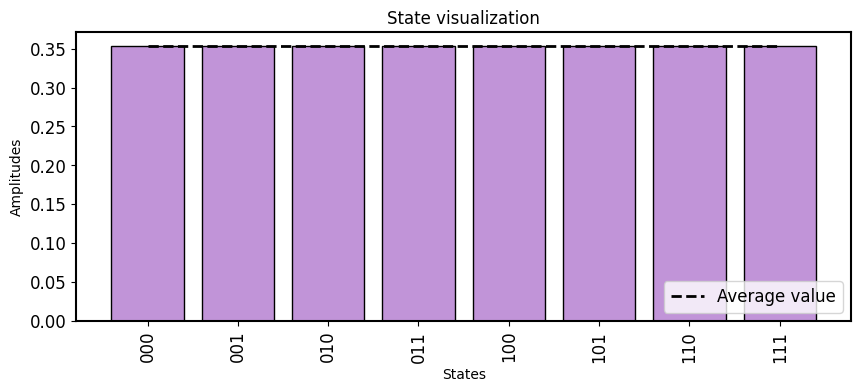

In [5]:
# plot input register amplitudes passing state and an extra agrument average_amp_value
plotscripts.plot_input_register_amplitudes(state, average_amp_value=ave)

What about the amplitude if we also consider the ancilla?

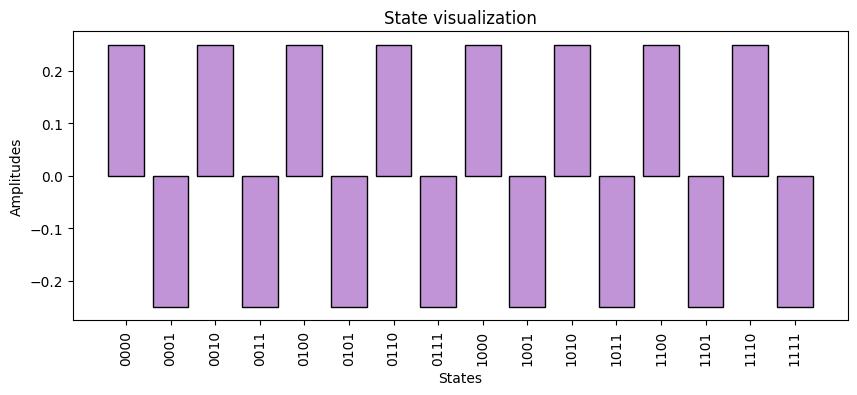

In [6]:
# plot the whole set of amplitudes to see what happens considering the ancilla
plotscripts.plot_amplitudes(state)

Since it was in the $|-\rangle$ st
ate, we have half of amplitudes multiplied by $-1$.

### Grover until the oracle

Now we are going to add to the circuit the oracle operator step by step.

<center><img src="./figures/oracle_layers.png" alt="drawing" width="800"/></center>

We can study what is happening to the system by setting an extra variable to the `build_oracle` function:

- setting `build_oracle(guilty_state, n, depth=1)` we build only the initial layer of NOT gates;
- setting `build_oracle(guilty_state, n, depth=2)` we build the NOT gates and the multi-controlled NOT so that we apply the **phase kickback**;
- setting `build_oracle(guilty_state, n, depth=3)` we build the full oracle.

Setting `depth=None` (namely not setting `depth`) we get the same result of setting `depth=3`.

In [10]:
# build circuit composed of initial layer + oracle with depth 1, 2, 3
c = grover.build_initial_layer(n) + grover.build_oracle(guilty_state, n, depth=3)

# save state
state = c().state()

# save average_amplitude after oracle execution using 
# utils.compute_input_register_amplitude(state)
ave = utils.compute_input_register_average_amplitude(state)

# draw the circuit
print(c.draw())

q0: ─H───o───
q1: ─H─X─o─X─
q2: ─H───o───
q3: ─X─H─X───


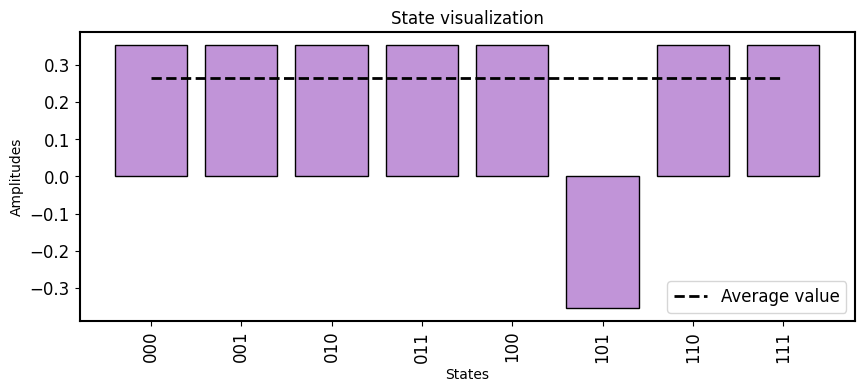

In [11]:
# plot input register amplitudes passing state and an extra agrument average_amp_value
plotscripts.plot_input_register_amplitudes(state, average_amp_value=ave)

### Grover until the diffusion operator

Now we do the same modular study of the diffusion operator.

<center><img src="./figures/diffusion_layers.png" alt="drawing" width="800"/></center>

Similarly to what we did with the oracle, we can set the `depth` variable as follows:

- setting `build_diffusion_operator(n, depth=1)` we add only the NOT gate to the ancilla;
- setting `build_diffusion_operator(n, depth=2)` we add H's to the input register;
- setting `build_diffusion_operator(n, depth=3)` we add X's to the input register;
- setting `build_diffusion_operator(n, depth=4)` we add the multi-controlled NOT;
- setting `build_diffusion_operator(n, depth=5)` we add again X's to the input register;
- setting `build_diffusion_operator(n, depth=6)` we add again H's to the input register;

Setting `depth=None` (namely not setting `depth`) we get the same result of setting `depth=6`.

In [22]:
# build circuit composed of initial layer + oracle with depth 3 + diff_op with various depth
c = grover.build_initial_layer(n) + grover.build_oracle(guilty_state, n, depth=3) + grover.build_diffusion_operator(n, depth=6)

# save state
state = c().state()

# draw the circuit
print(c.draw())

q0: ─H───o─H─X───o─X─H─
q1: ─H─X─o─X─H─X─o─X─H─
q2: ─H───o─H─X───o─X─H─
q3: ─X─H─X─X─────X─────


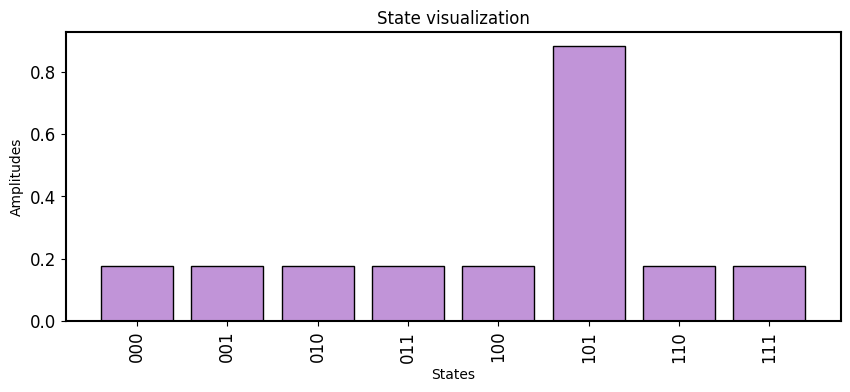

In [23]:
# plot input register amplitudes passing state and an extra agrument average_amp_value
plotscripts.plot_input_register_amplitudes(state)

### Pushing the amplitude to be close to 1

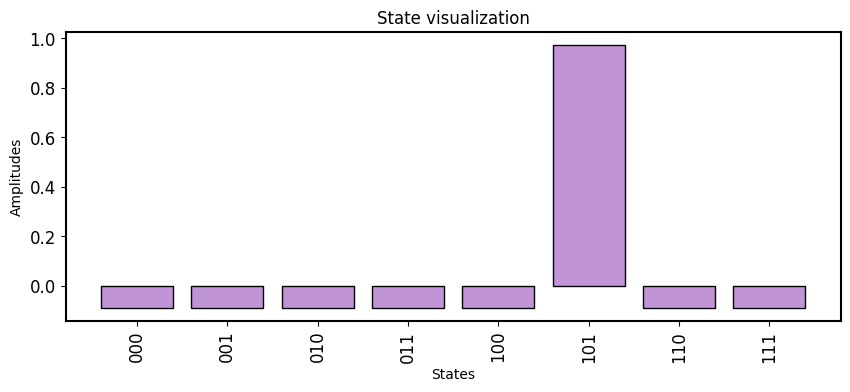

In [26]:
# compute a couple of times the Grover routine using grover.build_grover
c = grover.build_grover(guilty_state, n, nsteps=2)

# state
state = c().state()

# plot input register amplitudes
plotscripts.plot_input_register_amplitudes(state)